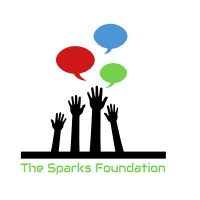

## **Author : Asmita Gayake**
 The Spark Foundation: Data Science and Business Analytics Internship

###**TASK 1: Prediction using Supervised ML** 

 Problem Statement : Predict the percentage of an student based on the no. of study hours.

   What will be predicted score if a student studies for 9.25 hrs/ day?

**Step 1:Importing Libraries**

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns


 **Step 2:Loading Dataset**

In [2]:


df = pd.read_csv('http://bit.ly/w-data')



In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Step 3:Analyse Data**

In [4]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Checking if there are any null values**

In [6]:
df.isnull == True

False

**Plotting data for better visualization**

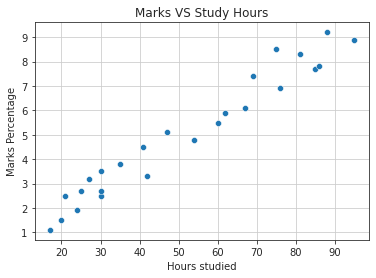

In [7]:
sns.set_style('ticks')
sns.scatterplot(y=df['Hours'],x=df['Scores'])
plt.title("Marks VS Study Hours")
plt.xlabel("Hours studied")
plt.ylabel("Marks Percentage")
plt.grid()
plt.show()

**Finding Correlation**

In [8]:
#correlation
df['Hours'].corr(df['Scores'])

0.9761906560220887

**Plotting Regression line**

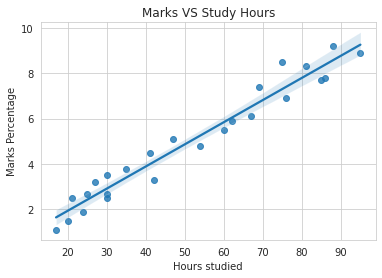

In [9]:
sns.set_style('whitegrid')
sns.regplot(y=df['Hours'],x=df['Scores'])
plt.title("Marks VS Study Hours")
plt.xlabel("Hours studied")
plt.ylabel("Marks Percentage")
plt.show()

**Here we can see that there is linear relationship between two variables**

**Applying Linear Regression**

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
from sklearn.model_selection import train_test_split

**Step 4:Training the Model**

In [12]:
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0) 

In [13]:
model = LinearRegression()

In [14]:
model.fit(x,y)
print("***Model Trained***")

***Model Trained***


**Step 5:Predicting Values**

In [15]:
test = 10
test = np.array(test).reshape(-1,1)

In [16]:
from IPython.utils.syspathcontext import prepended_to_syspath
pred_y = model.predict(x_test)
prediction = pd.DataFrame({'Hours':[i[0] for i in x_test],'Predicted Marks':[k for k in pred_y]})
print('predicted values ')
prediction

predicted values 


,Hours,Predicted Marks
0,1.5,17.147378
1,3.2,33.766244
2,7.4,74.824618
3,2.5,26.923182
4,5.9,60.160913
5,3.8,39.631726
6,1.9,21.057700


In [17]:
compare_scores = pd.DataFrame({'Actual marks':y_test,"Predicted marks":pred_y})
compare_scores

,Actual marks,Predicted marks
0,20,17.147378
1,27,33.766244
2,69,74.824618
3,30,26.923182
4,62,60.160913
5,35,39.631726
6,24,21.057700


**Measuring the distance of the predicted values and observed values.**

In [18]:
from sklearn.metrics import mean_absolute_error

In [19]:
print('mean absolute error',mean_absolute_error(y_test,pred_y))

mean absolute error 3.9904879158106015


**The smaller the Mean Squared Error,the closer you are to finding the line of best fit**

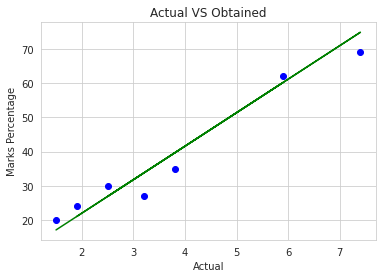

In [20]:
plt.scatter(x=x_test, y=y_test, color='blue')
plt.plot( x_test, pred_y, color='green')
plt.title("Actual VS Obtained")
plt.xlabel("Actual")
plt.ylabel("Marks Percentage")
plt.show()

In [21]:
hours = [9.25]
ans = model.predict([hours])
print("score ={}".format(round(ans[0],3)))

score =92.91


**If a student studies for 9.25 hrs/ day he/she will get score 92.91.**